<a href="https://colab.research.google.com/github/KrisMatrix/TensorFlow_Certification_Prep/blob/main/Kaggle_Exercises/Healthcare_Heart_Attack_Possibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare: Heart Attack Possibility

This is a dataset from kaggle that should be ideal for a beginner Machine Learning engineer/ Data Scientist to evaluate. It should be sutiable for binary classification and all the data in the dataset are numerical, so it is easier to evaluate.

In [1]:
!wget https://raw.githubusercontent.com/KrisMatrix/TensorFlow_Certification_Prep/main/Kaggle_Exercises/heart.csv

--2021-08-16 00:41:53--  https://raw.githubusercontent.com/KrisMatrix/TensorFlow_Certification_Prep/main/Kaggle_Exercises/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv.6’

heart.csv.6         100%[===================>]  11.06K  --.-KB/s    in 0s      

2021-08-16 00:41:53 (62.5 MB/s) - ‘heart.csv.6’ saved [11328/11328]



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
column_names = list(df.columns)
column_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

The data isn't normalized, but the problem is a classification type. The **target** column is the result. When the result is 1, we understand that there is a higher likelihood of a heart attack. When result is 0, it is lower likelihood.

In [5]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
X = df.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
#let's split the data 75/25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((227, 13), (76, 13), (227,), (76,))

In [9]:
#1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="sigmoid"),
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 1.9412 - accuracy: 0.4537
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 1.2001 - accuracy: 0.4537
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.4537
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.4537
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.9776 - accuracy: 0.4537
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.9382 - accuracy: 0.4537
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.9044 - accuracy: 0.4537
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.8822 - accuracy: 0.4537
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.8616 - accuracy: 0.4537
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.4537
Epoch 11/200
8/8 [===========

In [10]:
model_1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5395


[0.6904169321060181, 0.5394737124443054]

Text(0.5, 1.0, 'Accuracy, Loss vs Epochs')

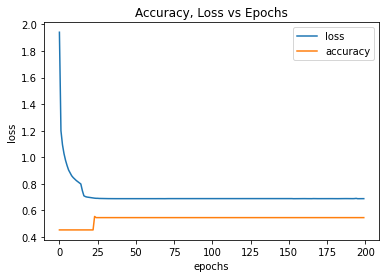

In [11]:
#Plot history (aka loss curve or a training curve)
pd.DataFrame(history_1.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Accuracy, Loss vs Epochs")

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,421
Trainable params: 2,421
Non-trainable params: 0
_________________________________________________________________


In [13]:
y_pred = model_1.predict(X_test)

In [14]:
X_test.iloc[0]

age          57.0
sex           1.0
cp            0.0
trestbps    150.0
chol        276.0
fbs           0.0
restecg       0.0
thalach     112.0
exang         1.0
oldpeak       0.6
slope         1.0
ca            1.0
thal          1.0
Name: 179, dtype: float64

In [15]:
y_test.iloc[0]

0

In [16]:
y_pred[0]

array([0.5533632], dtype=float32)

In [17]:
y_pred = model_1.predict(X)

In [18]:
X.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
Name: 0, dtype: float64

In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
y_pred[0]

array([0.5533632], dtype=float32)

Let's try running epochs for 1000

In [23]:
#1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="softmax"),
  tf.keras.layers.Dense(10, activation="sigmoid"),
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5463
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5463
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5463
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5463
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5463
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5463
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4934
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5463
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5022
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5463
Epoch 11/1000
8/8 [

Text(0.5, 1.0, 'Accuracy, Loss vs Epochs')

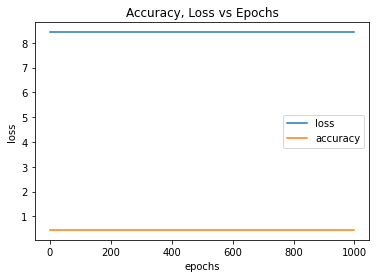

In [22]:
#Plot history (aka loss curve or a training curve)
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Accuracy, Loss vs Epochs")

In [28]:
#1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="sigmoid"),
  tf.keras.layers.Dense(10, activation="sigmoid"),
  tf.keras.layers.Dense(1,activation="relu")                               
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
history_3 = model_3.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4260 - accuracy: 0.4537
Epoch 11/1000
8/8 [

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "slope", "thal"]),
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X & y
X = df.drop("target", axis=1)
y = df["target"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHoteEncoded
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [32]:
#1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="softmax"),
  tf.keras.layers.Dense(10, activation="sigmoid"),
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
history_4 = model_4.fit(X_train_normal, y_train, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5022
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4978
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5463
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5463
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5463
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5463
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5463
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5463
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5463
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5022
Epoch 11/1000
8/8 [